In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pylab as plt
import mplfinance as mpf

%matplotlib inline

###  Import raw data

In [2]:
data = pd.read_csv('SPX2.csv')

###  Trancate data and make date column the index

In [3]:
trunc = data.iloc[-60:,:]

trunc.iloc[:,0] = pd.to_datetime( trunc.iloc[:, 0], format = '%Y-%m-%d')
trunc = trunc.set_index( pd.DatetimeIndex(trunc['Date']))

C:\Users\moone\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


###  To get axis to the figure and axes, use the returnfig option

<a list of 2 Line2D objects>


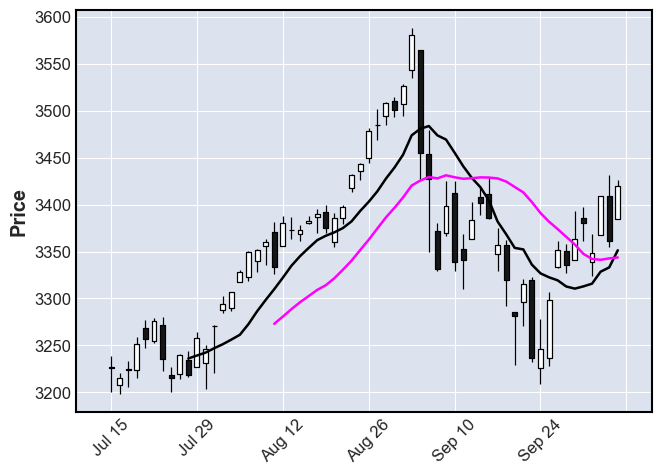

In [17]:
fig, axlist = mpf.plot(trunc, type = 'candle', mav = (10,20), returnfig = True)
ax1, ax2 = axlist

children = ax1.get_children()
lines = ax1.get_lines()

print(lines)

l1, l2 = lines
l1.set_color('k')

#print(l1.get_xydata())

#ax2.get_children()

###  Detecting crossovers

Pandas documentation on <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html">rolling()</A><br>
Pandas documentation on <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html">mean()</A><br>
Pandas documentation on <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.std.html">std()</A>

In [5]:
data['pct'] = data['Adj Close'].pct_change()
data['10'] = data['Adj Close'].rolling(10).mean()
data['20'] = data['Adj Close'].rolling(20).mean()
data['std'] = data['pct'].rolling(20).std()
data['upper'] = data['Adj Close'] + 2 * data['std'] * data['Adj Close']
data['lower'] = data['Adj Close'] - 2 * data['std'] * data['Adj Close']

In [6]:
trunc2 = data.iloc[-60:,:]

trunc2.iloc[:,0] = pd.to_datetime( trunc2.iloc[:, 0], format = '%Y-%m-%d')
trunc2 = trunc2.set_index( pd.DatetimeIndex(trunc2['Date']))

C:\Users\moone\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


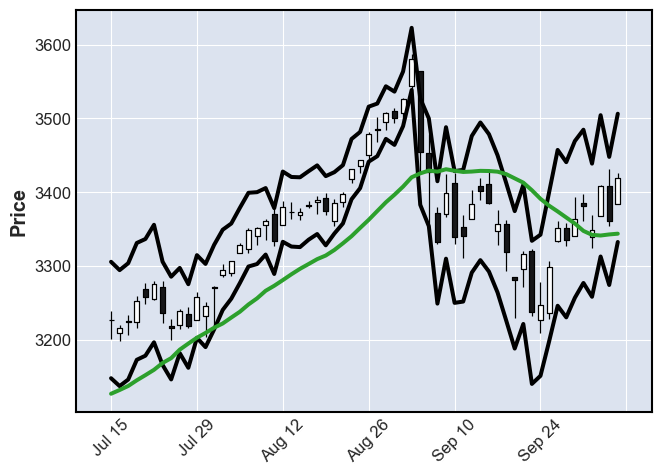

In [7]:
apd = mpf.make_addplot( trunc2[['lower', 'upper', '20']])
fig, axlist = mpf.plot(trunc2, type = 'candle', addplot = apd, returnfig = True)
lines = axlist[0].get_lines()
lines[0].set_color('k')
lines[1].set_color('k')

###  Our signal will be when the average crosses over the lower band from below.

We'll use a brute force method.  We take the function,
$$f(x) = \mbox{Moving Average} - \mbox{Lower Band}$$
We'll slide the values $f(x_i)$ and $(x_{i+1})$ along looking for when there is a sign change.

(2000.0, 3500.0)

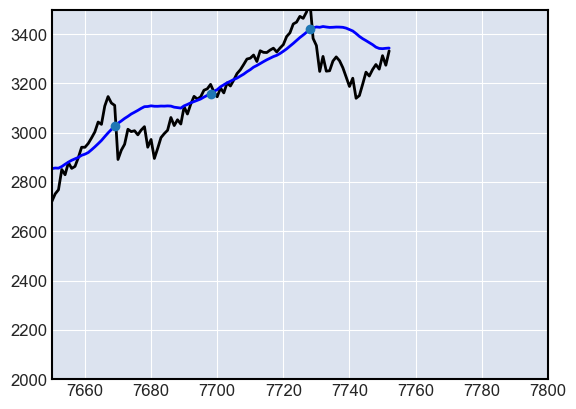

In [9]:
avg = data['20'].to_numpy()
lb = data['lower'].to_numpy()

plt.plot(lb, 'k')
plt.plot(avg, 'b')


objective = avg - lb
ind = []

for i in range(1, avg.size - 1):
    if objective[i + 1] >= 0 and objective[i] < 0:
        ind.append(i)
        
    if objective[i + 1] <= 0 and objective[i] > 0:
        #ind.append(i)
        pass

#  Let's plot our points on the moving average to confirm we got the right answers
plt.plot(ind, avg[ind], 'o')
plt.xlim(7650, 7800)
plt.ylim(2000, 3500)